In [1]:
from transformers import pipeline

### Loading model

In [2]:
detector = pipeline(
    'object-detection',
    model = 'facebook/detr-resnet-50'
)

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

In [3]:
from PIL import Image

In [14]:
img = Image.open(r"C:\Users\DELL\Downloads\Example-difficult-images-for-object-detection_Q320.jpg")

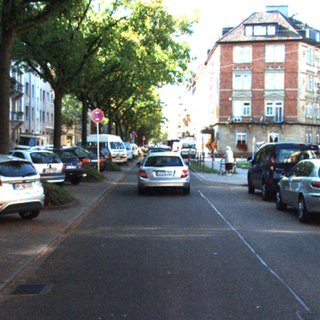

In [15]:
img

In [16]:
results = detector(img)

In [17]:
results

[{'score': 0.9726449847221375,
  'label': 'car',
  'box': {'xmin': 50, 'ymin': 149, 'xmax': 87, 'ymax': 183}},
 {'score': 0.9968240261077881,
  'label': 'car',
  'box': {'xmin': 272, 'ymin': 156, 'xmax': 319, 'ymax': 224}},
 {'score': 0.9288219213485718,
  'label': 'car',
  'box': {'xmin': 127, 'ymin': 144, 'xmax': 138, 'ymax': 158}},
 {'score': 0.9089229702949524,
  'label': 'car',
  'box': {'xmin': 83, 'ymin': 136, 'xmax': 127, 'ymax': 163}},
 {'score': 0.9318810701370239,
  'label': 'car',
  'box': {'xmin': 146, 'ymin': 144, 'xmax': 169, 'ymax': 154}},
 {'score': 0.9956218600273132,
  'label': 'car',
  'box': {'xmin': 0, 'ymin': 152, 'xmax': 45, 'ymax': 221}},
 {'score': 0.9989607334136963,
  'label': 'car',
  'box': {'xmin': 136, 'ymin': 152, 'xmax': 190, 'ymax': 194}},
 {'score': 0.990670919418335,
  'label': 'person',
  'box': {'xmin': 223, 'ymin': 143, 'xmax': 235, 'ymax': 175}},
 {'score': 0.9838602542877197,
  'label': 'car',
  'box': {'xmin': 8, 'ymin': 148, 'xmax': 66, 'ymax

In [18]:
from helper import load_image_from_url, render_results_in_image

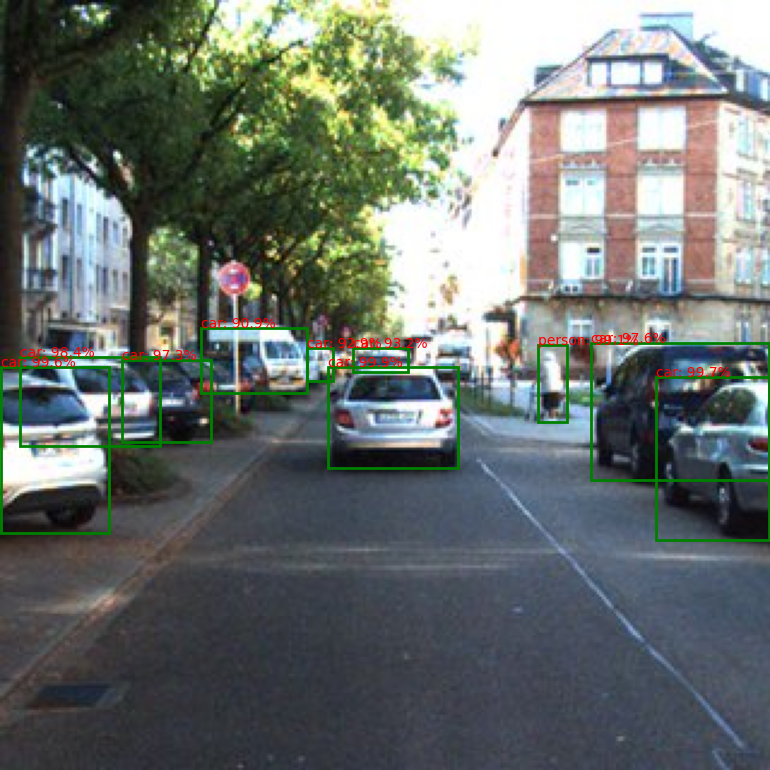

In [19]:
render_results_in_image(img,results)

In [21]:
import gradio as gr

### Function to perfrom predictions

In [27]:
def get_prediction(img):
    results = detector(img)

    output = render_results_in_image(img, results)

    return output

### Interface of gradio

In [28]:
app = gr.Interface(
    fn = get_prediction,

    inputs = gr.Image(label='input_image', type='pil'),
    outputs = gr.Image(label='output_image', type='pil')

)

In [29]:
app.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


In [26]:
app.close()

Closing server running on port: 7860


In [31]:
results

[{'score': 0.9726449847221375,
  'label': 'car',
  'box': {'xmin': 50, 'ymin': 149, 'xmax': 87, 'ymax': 183}},
 {'score': 0.9968240261077881,
  'label': 'car',
  'box': {'xmin': 272, 'ymin': 156, 'xmax': 319, 'ymax': 224}},
 {'score': 0.9288219213485718,
  'label': 'car',
  'box': {'xmin': 127, 'ymin': 144, 'xmax': 138, 'ymax': 158}},
 {'score': 0.9089229702949524,
  'label': 'car',
  'box': {'xmin': 83, 'ymin': 136, 'xmax': 127, 'ymax': 163}},
 {'score': 0.9318810701370239,
  'label': 'car',
  'box': {'xmin': 146, 'ymin': 144, 'xmax': 169, 'ymax': 154}},
 {'score': 0.9956218600273132,
  'label': 'car',
  'box': {'xmin': 0, 'ymin': 152, 'xmax': 45, 'ymax': 221}},
 {'score': 0.9989607334136963,
  'label': 'car',
  'box': {'xmin': 136, 'ymin': 152, 'xmax': 190, 'ymax': 194}},
 {'score': 0.990670919418335,
  'label': 'person',
  'box': {'xmin': 223, 'ymin': 143, 'xmax': 235, 'ymax': 175}},
 {'score': 0.9838602542877197,
  'label': 'car',
  'box': {'xmin': 8, 'ymin': 148, 'xmax': 66, 'ymax

### Converting the predictions to speech 

In [32]:
from helper import summarize_predictions_natural_language

In [34]:
text = summarize_predictions_natural_language(results)

In [36]:
narrator = pipeline('text-to-speech',
         model = 'suno/bark-small'
        )

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

F:\Data Science\Generative AI\generative_ai\lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


generation_config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [48]:
narrated_text = narrator(text, forward_params={"do_sample": True})

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [38]:
narrated_text

{'audio': array([[0.00233776, 0.00172872, 0.00176258, ..., 0.00065158, 0.00072306,
         0.00076799]], dtype=float32),
 'sampling_rate': 24000}

In [45]:
from IPython.display import Audio

In [47]:
Audio(narrated_text['audio'], rate = narrated_text['sampling_rate'])